In [1]:
import numpy as np
import Neural_Network_Tools.tools as nnt
NUM_OF_CLASSES = 3

In [14]:
import tensorflow as tf
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
(train_data, train_labels),(test_data, test_labels) = nnt.prepare_train_test_dataset()
# conv_train_data = train_data.to_numpy()

In [34]:
from keras.layers import Dense
from keras.layers import Input
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

EPOCHS = 80

fnn = Sequential([
    Input(shape=(4,), name="input-layer"),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(16, activation="relu"),
    Dense(3, name="output_layer")
],name="fnn_model")

plot_model(fnn, "fnn_architecture.pdf", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [35]:
fnn_model, fnn_history, training_time = nnt.train_model(fnn, train_data, train_labels, EPOCHS)

Epoch 1/80
2168/2168 [==============================] - 5s 2ms/step - loss: 0.2610 - acc: 0.8927 - val_loss: 0.1536 - val_acc: 0.9342
Epoch 2/80
2168/2168 [==============================] - 4s 2ms/step - loss: 0.1733 - acc: 0.9281 - val_loss: 0.1322 - val_acc: 0.9507
Epoch 3/80
2168/2168 [==============================] - 4s 2ms/step - loss: 0.1590 - acc: 0.9335 - val_loss: 0.1452 - val_acc: 0.9351
Epoch 4/80
2168/2168 [==============================] - 4s 2ms/step - loss: 0.1537 - acc: 0.9354 - val_loss: 0.1387 - val_acc: 0.9436
Epoch 5/80
2168/2168 [==============================] - 4s 2ms/step - loss: 0.1447 - acc: 0.9399 - val_loss: 0.1339 - val_acc: 0.9399
Epoch 6/80
2168/2168 [==============================] - 4s 2ms/step - loss: 0.1399 - acc: 0.9414 - val_loss: 0.1222 - val_acc: 0.9486
Epoch 7/80
2168/2168 [==============================] - 4s 2ms/step - loss: 0.1358 - acc: 0.9432 - val_loss: 0.1227 - val_acc: 0.9507
Epoch 8/80
2168/2168 [==============================] - 4s 2ms

{'loss': 0.025520959869027138, 'acc': 0.9905291795730591, 'val_loss': 0.011899261735379696, 'val_acc': 0.995589017868042, 'training_time': 339.7929449081421}


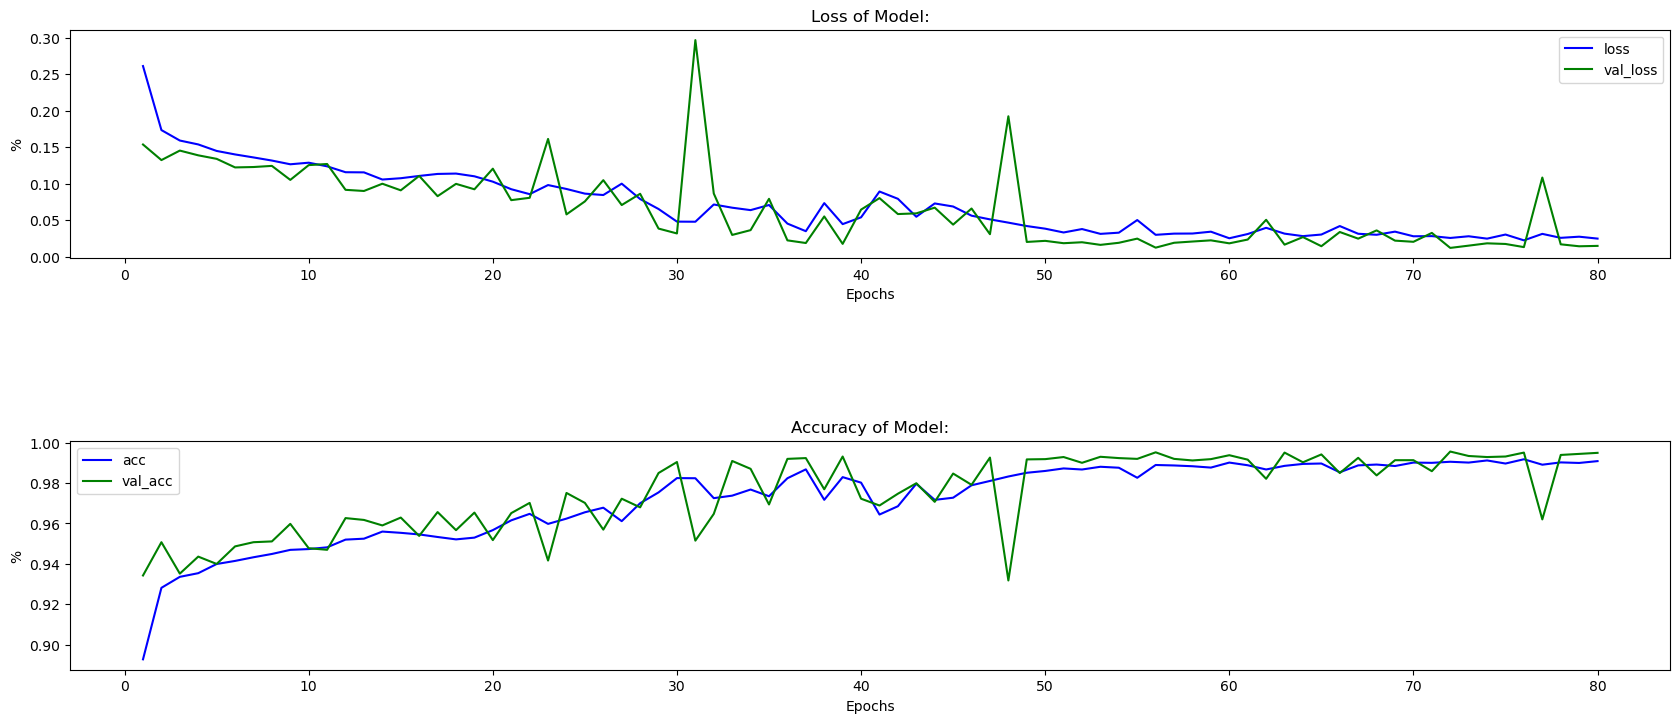

In [36]:
history_dict = nnt.print_best_history(fnn_history, training_time)
nnt.plot_history(history=fnn_history, epochs_size=EPOCHS, file_name="history_fnn")

In [7]:
loss, accuracy, testing_time = nnt.evaluate_model(model_path="fnn_model.h5", test_data=test_data, test_labels=test_labels)
print("Time for testing: " + str(testing_time))

Evaluate on test data:
151/151 [==============================] - 0s 1ms/step - loss: 0.0269 - acc: 0.9941
test loss, test acc: [0.026883697137236595, 0.9941359758377075]
Time for testing: 0.3854637145996094


In [8]:
from keras import Sequential 
from keras.layers import Conv1D, Dense, Flatten, Input
from keras.utils.vis_utils import plot_model
conv_fnn = Sequential([
    Input(shape=(4,1), name="input-layer"),
    Conv1D(filters=9, kernel_size=2, activation="relu"),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16,activation="relu"),
    Flatten(),
    Dense(3)
], name="conv_fnn_model")
plot_model(conv_fnn, "conv_fnn_architecture.pdf", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
# conv_train_data = train_data.reshape(77079,4,1)

conv_fnn_model, conv_fnn_history, training_time = nnt.train_model(conv_fnn, train_data, train_labels, EPOCHS)

Epoch 1/80
2168/2168 [==============================] - 16s 7ms/step - loss: 0.6631 - acc: 0.7507 - val_loss: 0.4511 - val_acc: 0.8390
Epoch 2/80
2168/2168 [==============================] - 8s 4ms/step - loss: 0.3257 - acc: 0.8728 - val_loss: 0.2529 - val_acc: 0.9015
Epoch 3/80
2168/2168 [==============================] - 14s 6ms/step - loss: 0.2622 - acc: 0.8934 - val_loss: 0.2311 - val_acc: 0.8966
Epoch 4/80
2168/2168 [==============================] - 14s 6ms/step - loss: 0.2440 - acc: 0.9000 - val_loss: 0.2193 - val_acc: 0.9111
Epoch 5/80
2168/2168 [==============================] - 7s 3ms/step - loss: 0.2367 - acc: 0.9046 - val_loss: 0.2339 - val_acc: 0.8895
Epoch 6/80
2168/2168 [==============================] - 8s 4ms/step - loss: 0.2295 - acc: 0.9074 - val_loss: 0.2085 - val_acc: 0.9207
Epoch 7/80
2168/2168 [==============================] - 7s 3ms/step - loss: 0.2230 - acc: 0.9108 - val_loss: 0.2036 - val_acc: 0.9219
Epoch 8/80
2168/2168 [==============================] - 15s

{'loss': 0.06217370554804802, 'acc': 0.979270875453949, 'val_loss': 0.04330344498157501, 'val_acc': 0.9875454306602478, 'training_time': 881.8586957454681}


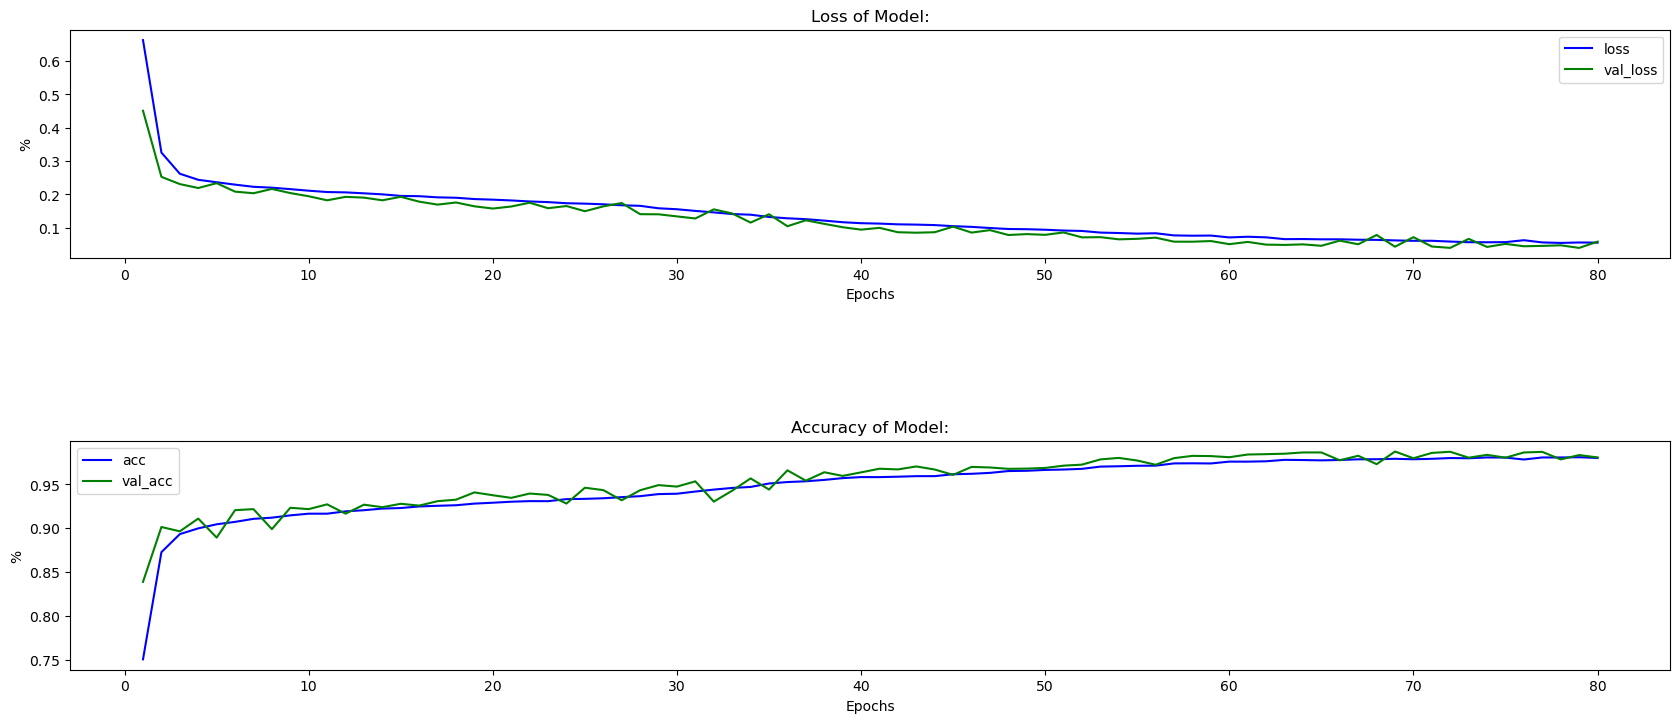

In [10]:
history_dict = nnt.print_best_history(conv_fnn_history, training_time)
nnt.plot_history(history=conv_fnn_history, epochs_size=EPOCHS, file_name="history_conv_fnn")

In [8]:
loss, accuracy, testing_time = nnt.evaluate_model(model_path="conv_fnn_model.h5", test_data=test_data, test_labels=test_labels)
print("Time for testing: " + str(testing_time))

Evaluate on test data:
151/151 [==============================] - 0s 1ms/step - loss: 0.0637 - acc: 0.9824
test loss, test acc: [0.06366802006959915, 0.9824078679084778]
Time for testing: 0.4683990478515625


# Result: FNN is the winnner! 